In [1]:
#pip install opencv-python

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [3]:
cv2.imread?

The type of this input is <class 'numpy.ndarray'>
Shape: (450, 600, 3)


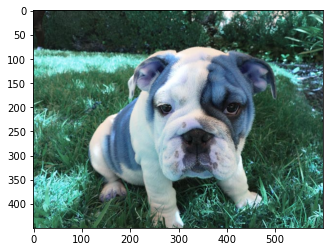

In [4]:
path = r'C:\Users\soule\OneDrive\Pictures\addie.jpg'
image = cv2.imread(path)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

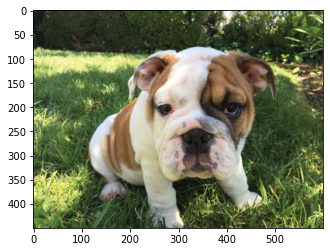

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

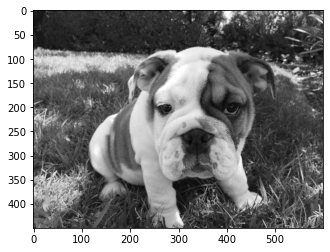

In [6]:

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.savefig('BWAddie.jpg')

In [7]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    print(image.shape)
    return image

In [8]:
l = get_image(path)
print(l)
maxx = l[0][0]
for i in range(450):
    for j in range(600):
        if l[i][j] > maxx:
            maxx = l[i][j]
            
print(maxx)

(450, 600)
[[ 30  31  33 ...  71  79  95]
 [ 31  32  34 ...  76  74  99]
 [ 31  32  34 ... 105  87 113]
 ...
 [ 90  88  85 ... 116  98  91]
 [ 87  89  78 ... 111 120 101]
 [ 66  63  48 ... 110 129 101]]
255


In [9]:
import random
random.randint(1,2)

2

In [10]:
newl = l
rows,cols = l.shape
for i in range(rows):
    for j in range(cols):
        r = random.randint(1,2)
        newl[i][j] = (l[i][j] + r)
print(newl)

[[ 32  33  35 ...  72  81  96]
 [ 32  33  36 ...  77  75 100]
 [ 32  33  35 ... 106  89 114]
 ...
 [ 91  90  86 ... 118 100  93]
 [ 89  90  80 ... 112 122 103]
 [ 68  65  49 ... 112 131 102]]


In [11]:
maxx2 = newl[0][0]
for i in range(450):
    for j in range(600):
        if newl[i][j] > maxx2:
            maxx2 = l[i][j]
print(maxx2)

255


In [12]:
from PIL import Image as im
data = im.fromarray(newl) 
      
# saving the final output  
# as a PNG file 
#data.save('decrypt.png')

In [13]:
def IntegerDigits(p,b):
    arr = []
    while p>=1:
        arr.append(p%b)
        p = p//b
    A = arr[::-1]
    return len(A)-1

In [14]:
totalPixs = rows*cols
print(totalPixs)
groupSize = IntegerDigits(totalPixs,258)

270000


In [15]:
groupedArray = np.reshape(newl, (totalPixs//groupSize, groupSize), order='C')

In [16]:
def singleLargeInteger(A,base):
    integer = 0
    power = 0
    Anew = A[::-1]
    for i in range(len(Anew)):
        integer += (Anew[i] * base**i)
    return integer

In [17]:
A=[1,2,3,4,5,6,7,8,9]
singleLargeInteger(A,11)

259374245

In [18]:
25//258

0

In [19]:
def IntegerToArray(n,base):
    A = []
    while n>=1:
        A.append(n%base)
        n = n//base
    Aflip = A[::-1]
    return Aflip

In [20]:
IntegerToArray(6457,258)

[25, 7]

In [21]:
Pm = []
for i in range(totalPixs//groupSize):
    newValue = singleLargeInteger(groupedArray[i],258)
    Pm.append(newValue)
print(len(Pm))
if len(Pm)%2 == 1:
    Pm.append(0)
#print(Pm)
maxP = Pm[0]
for i in range(len(Pm)):
    if Pm[i]>maxP:
        maxP = Pm[i]
print(maxP)

135000
66045


In [22]:
imagePointsArray = np.reshape(Pm, (len(Pm)//2, 2), order='C')
print(imagePointsArray)

[[ 8289  9067]
 [10621 11398]
 [11911 10098]
 ...
 [20450 14249]
 [13738 22281]
 [25654 33900]]


In [23]:
def Generate_Point(a,b,p):
    x = np.arange(0,p//2)
    y = np.arange(0,p//2)
    for i in range(len(x)):
        for j in range(len(y)):
            yval = ((x[i]**3) + (a*x[i]) + b)%p
            #print(x[i],y[j],y[j]**2 % p, yval)
            #print(yval)
            if ((y[j]**2)%p == yval):
                print(x[i],y[j])
               

In [24]:
#Generate_Point(a,b,p)

In [25]:
privateA = 741
privateB = 9812

In [26]:
p = 524287
a = 345257
b = -93473
G = [25,67833]
k = 1982

#A = [49, 112186]
#B = [104, 241140]

In [27]:
from sympy import mod_inverse

mod_inverse(11, 35) # returns 16

16

In [28]:
def modInverse(a, p):
     
    for x in range(1, p):
        if (((a%p) * (x%p)) % p == 1):
            return x
    return 1
def point_addition(x1,y1,x2,y2,p,a):
    x3,y3=0,0
    if x1!=x2 and y1!=y2:
        m = ((y2-y1)*mod_inverse(x2-x1,p))%p
        x3 = m**2 - x1 - x2
        x3 = x3%p
        y3 = m*(x1-x3) - y1
        y3 = y3%p
        
    elif x1==x2 and y1==y2:
        m = ((3*(x1**2) + a)*(mod_inverse(2*y1,p)))%p
        x3 = (m**2 - 2*x1)%p
        y3 = (m*(x1-x3) - y1)%p
    return x3,y3

def point_multiplication(x,y,k,p,a):
    xnew,ynew = x,y
    for i in range((10-1)):
        xnew,ynew = point_addition(x,y,xnew,ynew,p,a)
        return xnew,ynew

In [29]:
publicA = point_multiplication(G[0],G[1],privateA,p,a)
publicB = point_multiplication(G[0],G[1],privateB,p,a)


In [30]:
kG = point_multiplication(G[0],G[1],k,p,a)
print(kG)
k_publicB = point_multiplication(publicB[0],publicB[1],k,p,a)
print(k_publicB)


(510363, 499040)
(310060, 143182)


In [31]:
import sys
import time

def print_percent_done(index, total, bar_len=50, title='Please wait'):
    '''
    index is expected to be 0 based index. 
    0 <= index < total
    '''
    percent_done = (index+1)/total*100
    percent_done = round(percent_done, 1)

    done = round(percent_done/(100/bar_len))
    togo = bar_len-done

    done_str = '█'*int(done)
    togo_str = '░'*int(togo)

    print(f'\t⏳{title}: [{done_str}{togo_str}] {percent_done}% done', end='\r')

    if round(percent_done) == 100:
        print('\t✅')


r = 50
for i in range(r):
    print_percent_done(i,r)
    time.sleep(.02)

	✅Please wait: [██████████████████████████████████████████████████] 100.0% done


In [32]:
import sys
coordinates, variables = imagePointsArray.shape
print(coordinates)
cipher_array = []
r=coordinates
for i in range(coordinates):
    cx,cy = point_addition(imagePointsArray[i][0], imagePointsArray[i][1], k_publicB[0], k_publicB[1], p, a)
    cipher_array.append(cx)
    cipher_array.append(cy)
    #print(len(cipher_array))


67500


<ipython-input-28-2fc22c8a473d>:10: RuntimeWarning: overflow encountered in long_scalars
  m = ((y2-y1)*mod_inverse(x2-x1,p))%p
<ipython-input-28-2fc22c8a473d>:13: RuntimeWarning: overflow encountered in long_scalars
  y3 = m*(x1-x3) - y1
<ipython-input-28-2fc22c8a473d>:11: RuntimeWarning: overflow encountered in long_scalars
  x3 = m**2 - x1 - x2


In [33]:
print(len(cipher_array))

135000


In [34]:
cipher_array_ranged = []
#print(cipher_array[0])
for i in range(len(cipher_array)):
    arr = IntegerToArray(cipher_array[i],256)
    while len(arr)>2:
        arr.remove(arr[0])
    while len(arr)<2:
        arr.insert(0,0)
    for j in arr:
        cipher_array_ranged.append(j)
print(len(cipher_array_ranged))

270000


In [35]:
encryption_arr = np.array(cipher_array_ranged, dtype=int)
encryption_arr = np.reshape(encryption_arr, (rows, cols), order='C')
encryption_arr

array([[  6, 218, 159, ...,  72, 112, 133],
       [ 36,  77, 250, ...,  68, 105,  16],
       [  6, 218, 159, ..., 135,  20,  12],
       ...,
       [207, 104, 163, ..., 138, 115,  91],
       [110, 194, 148, ...,  75, 197,  92],
       [121, 144,  56, ..., 253, 140, 106]])

In [39]:
data2 = im.fromarray(encryption_arr.astype(np.uint8)) 
data2.show()      
# saving the final output  
# as a PNG file 
#data2.save('encrypt2.png')

In [37]:
unencrypt = np.reshape(encryption_arr, (totalPixs//groupSize, groupSize), order='C')

In [38]:
privateB_kG = point_multiplication(kG[0],kG[1],privateB,p,a)

-------------------------------------------------------------------------------------------------------------------------------